# import library 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import math
import string
import nltk
from nltk.stem import PorterStemmer
import warnings #But we need to hide these warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=DeprecationWarning)
warnings.filterwarnings("ignore",category=UserWarning)
sns.set_style("whitegrid")
%matplotlib inline
np.random.seed(7)

In [2]:
 df=pd.read_csv('D:/PROJECTS/Amazon Product Review/1429_1.csv')
print(df)

                         id  \
0      AVqkIhwDv8e3D1O-lebb   
1      AVqkIhwDv8e3D1O-lebb   
2      AVqkIhwDv8e3D1O-lebb   
3      AVqkIhwDv8e3D1O-lebb   
4      AVqkIhwDv8e3D1O-lebb   
...                     ...   
34655  AVpfiBlyLJeJML43-4Tp   
34656  AVpfiBlyLJeJML43-4Tp   
34657  AVpfiBlyLJeJML43-4Tp   
34658  AVpfiBlyLJeJML43-4Tp   
34659  AVpfiBlyLJeJML43-4Tp   

                                                    name       asins   brand  \
0      All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...  B01AHB9CN2  Amazon   
1      All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...  B01AHB9CN2  Amazon   
2      All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...  B01AHB9CN2  Amazon   
3      All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...  B01AHB9CN2  Amazon   
4      All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...  B01AHB9CN2  Amazon   
...                                                  ...         ...     ...   
34655                                                NaN  B006GWO5W

In [3]:
print(len(df))

34660


In [4]:
df.shape

(34660, 21)

In [5]:
df.columns

Index(['id', 'name', 'asins', 'brand', 'categories', 'keys', 'manufacturer',
       'reviews.date', 'reviews.dateAdded', 'reviews.dateSeen',
       'reviews.didPurchase', 'reviews.doRecommend', 'reviews.id',
       'reviews.numHelpful', 'reviews.rating', 'reviews.sourceURLs',
       'reviews.text', 'reviews.title', 'reviews.userCity',
       'reviews.userProvince', 'reviews.username'],
      dtype='object')

In [28]:
df.head(5)

,id,name,asins,brand,categories,keys,manufacturer,reviews.date,reviews.dateAdded,reviews.dateSeen,reviews.didPurchase,reviews.doRecommend,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username
0,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",NaN,True,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,"[p, r, o, d, u, c, t, , f, a, r, , d, i, s, ...",Kindle,Adapter
1,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",NaN,True,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,"[g, r, e, a, t, , b, e, g, i, n, n, e, r, , ...",very fast,truman
2,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",NaN,True,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,"[i, n, e, x, p, e, n, s, i, v, e, , t, a, b, ...",Beginner tablet for our 9 year old son.,DaveZ
3,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",NaN,True,0.0,4.0,http://reviews.bestbuy.com/3545/5620406/review...,"[i, v, e, , f, i, r, e, , h, d, , 8, , t, ...",Good!!!,Shacks
4,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-12T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",NaN,True,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,"[b, o, u, g, h, t, , g, r, a, n, d, , d, a, ...",Fantastic Tablet for kids,explore42


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34660 entries, 0 to 34659
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    34660 non-null  object 
 1   name                  27900 non-null  object 
 2   asins                 34658 non-null  object 
 3   brand                 34660 non-null  object 
 4   categories            34660 non-null  object 
 5   keys                  34660 non-null  object 
 6   manufacturer          34660 non-null  object 
 7   reviews.date          34621 non-null  object 
 8   reviews.dateAdded     24039 non-null  object 
 9   reviews.dateSeen      34660 non-null  object 
 10  reviews.didPurchase   1 non-null      object 
 11  reviews.doRecommend   34066 non-null  object 
 12  reviews.id            1 non-null      float64
 13  reviews.numHelpful    34131 non-null  float64
 14  reviews.rating        34627 non-null  float64
 15  reviews.sourceURLs 

In [8]:
df.dtypes

id                       object
name                     object
asins                    object
brand                    object
categories               object
keys                     object
manufacturer             object
reviews.date             object
reviews.dateAdded        object
reviews.dateSeen         object
reviews.didPurchase      object
reviews.doRecommend      object
reviews.id              float64
reviews.numHelpful      float64
reviews.rating          float64
reviews.sourceURLs       object
reviews.text             object
reviews.title            object
reviews.userCity        float64
reviews.userProvince    float64
reviews.username         object
dtype: object

In [9]:
df.tail()

,id,name,asins,brand,categories,keys,manufacturer,reviews.date,reviews.dateAdded,reviews.dateSeen,...,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username
34655,AVpfiBlyLJeJML43-4Tp,NaN,B006GWO5WK,Amazon,"Computers/Tablets & Networking,Tablet & eBook ...",newamazonkindlefirehd9wpowerfastadaptercharger...,"Amazon Digital Services, Inc",2012-09-18T00:00:00Z,NaN,2015-08-29T00:00:00Z,...,NaN,NaN,NaN,3.0,http://www.amazon.com/Amazon-PowerFast-Adapter...,This is not appreciably faster than any other ...,Not appreciably faster than any other 1.8A cha...,NaN,NaN,Kris
34656,AVpfiBlyLJeJML43-4Tp,NaN,B006GWO5WK,Amazon,"Computers/Tablets & Networking,Tablet & eBook ...",newamazonkindlefirehd9wpowerfastadaptercharger...,"Amazon Digital Services, Inc",2012-11-21T00:00:00Z,NaN,2015-09-02T00:00:00Z,...,NaN,NaN,NaN,1.0,http://www.amazon.com/Amazon-PowerFast-Adapter...,Amazon should include this charger with the Ki...,Should be included,NaN,NaN,Jonathan Stewart
34657,AVpfiBlyLJeJML43-4Tp,NaN,B006GWO5WK,Amazon,"Computers/Tablets & Networking,Tablet & eBook ...",newamazonkindlefirehd9wpowerfastadaptercharger...,"Amazon Digital Services, Inc",2012-10-19T00:00:00Z,NaN,2015-09-04T00:00:00Z,...,NaN,NaN,NaN,1.0,http://www.amazon.com/Amazon-PowerFast-Adapter...,Love my Kindle Fire but I am really disappoint...,Disappointing Charger,NaN,NaN,J Lawson
34658,AVpfiBlyLJeJML43-4Tp,NaN,B006GWO5WK,Amazon,"Computers/Tablets & Networking,Tablet & eBook ...",newamazonkindlefirehd9wpowerfastadaptercharger...,"Amazon Digital Services, Inc",2012-10-31T00:00:00Z,NaN,2015-09-01T00:00:00Z,...,NaN,NaN,NaN,1.0,http://www.amazon.com/Amazon-PowerFast-Adapter...,I was surprised to find it did not come with a...,Not worth the money,NaN,NaN,Just the Buyer
34659,AVpfiBlyLJeJML43-4Tp,NaN,B006GWO5WK,Amazon,"Computers/Tablets & Networking,Tablet & eBook ...",newamazonkindlefirehd9wpowerfastadaptercharger...,"Amazon Digital Services, Inc",2012-12-23T00:00:00Z,NaN,2015-11-01T00:00:00Z,...,NaN,NaN,NaN,1.0,http://www.amazon.com/Amazon-PowerFast-Adapter...,to spite the fact that i have nothing but good...,as with everyone else,NaN,NaN,sandi


In [10]:
df.describe()

,reviews.id,reviews.numHelpful,reviews.rating,reviews.userCity,reviews.userProvince
count,1.0,34131.000000,34627.000000,0.0,0.0
mean,111372787.0,0.630248,4.584573,NaN,NaN
std,NaN,13.215775,0.735653,NaN,NaN
min,111372787.0,0.000000,1.000000,NaN,NaN
25%,111372787.0,0.000000,4.000000,NaN,NaN
50%,111372787.0,0.000000,5.000000,NaN,NaN
75%,111372787.0,0.000000,5.000000,NaN,NaN
max,111372787.0,814.000000,5.000000,NaN,NaN


In [11]:
columns_to_remove = ['reviews.userCity', 'reviews.userProvince', 'reviews.id']
df = df.drop(columns=columns_to_remove, axis=1)
df

,id,name,asins,brand,categories,keys,manufacturer,reviews.date,reviews.dateAdded,reviews.dateSeen,reviews.didPurchase,reviews.doRecommend,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username
0,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",NaN,True,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,This product so far has not disappointed. My c...,Kindle,Adapter
1,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",NaN,True,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,great for beginner or experienced person. Boug...,very fast,truman
2,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",NaN,True,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,Inexpensive tablet for him to use and learn on...,Beginner tablet for our 9 year old son.,DaveZ
3,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",NaN,True,0.0,4.0,http://reviews.bestbuy.com/3545/5620406/review...,I've had my Fire HD 8 two weeks now and I love...,Good!!!,Shacks
4,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-12T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",NaN,True,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,I bought this for my grand daughter when she c...,Fantastic Tablet for kids,explore42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34655,AVpfiBlyLJeJML43-4Tp,NaN,B006GWO5WK,Amazon,"Computers/Tablets & Networking,Tablet & eBook ...",newamazonkindlefirehd9wpowerfastadaptercharger...,"Amazon Digital Services, Inc",2012-09-18T00:00:00Z,NaN,2015-08-29T00:00:00Z,NaN,NaN,NaN,3.0,http://www.amazon.com/Amazon-PowerFast-Adapter...,This is not appreciably faster than any other ...,Not appreciably faster than any other 1.8A cha...,Kris
34656,AVpfiBlyLJeJML43-4Tp,NaN,B006GWO5WK,Amazon,"Computers/Tablets & Networking,Tablet & eBook ...",newamazonkindlefirehd9wpowerfastadaptercharger...,"Amazon Digital Services, Inc",2012-11-21T00:00:00Z,NaN,2015-09-02T00:00:00Z,NaN,NaN,NaN,1.0,http://www.amazon.com/Amazon-PowerFast-Adapter...,Amazon should include this charger with the Ki...,Should be included,Jonathan Stewart
34657,AVpfiBlyLJeJML43-4Tp,NaN,B006GWO5WK,Amazon,"Computers/Tablets & Networking,Tablet & eBook ...",newamazonkindlefirehd9wpowerfastadaptercharger...,"Amazon Digital Services, Inc",2012-10-19T00:00:00Z,NaN,2015-09-04T00:00:00Z,NaN,NaN,NaN,1.0,http://www.amazon.com/Amazon-PowerFast-Adapter...,Love my Kindle Fire but I am really disappoint...,Disappointing Charger,J Lawson
34658,AVpfiBlyLJeJML43-4Tp,NaN,B006GWO5WK,Amazon,"Computers/Tablets & Networking,Tablet & eBook ...",newamazonkindlefirehd9wpowerfastadaptercharger...,"Amazon Digital Services, Inc",2012-10-31T00:00:00Z,NaN,2015-09-01T00:00:00Z,NaN,NaN,NaN,1.0,http://www.amazon.com/Amazon-PowerFast-Adapter...,I was surprised t

# Dealing with missing values

In [12]:
np.sum(df.isnull().any(axis=1))

34659

In [13]:
print('Count of columns in the data is:  ', len(df.columns))
print('Count of rows in the data is:  ', len(df))

Count of columns in the data is:   18
Count of rows in the data is:   34660


In [14]:
df['reviews.rating'].unique()

array([ 5.,  4.,  2.,  1.,  3., nan])

In [15]:
df['reviews.rating'].nunique()

5

In [16]:
df['reviews.rating'].fillna(0, inplace=True)
print(df['reviews.rating'].unique())

[5. 4. 2. 1. 3. 0.]


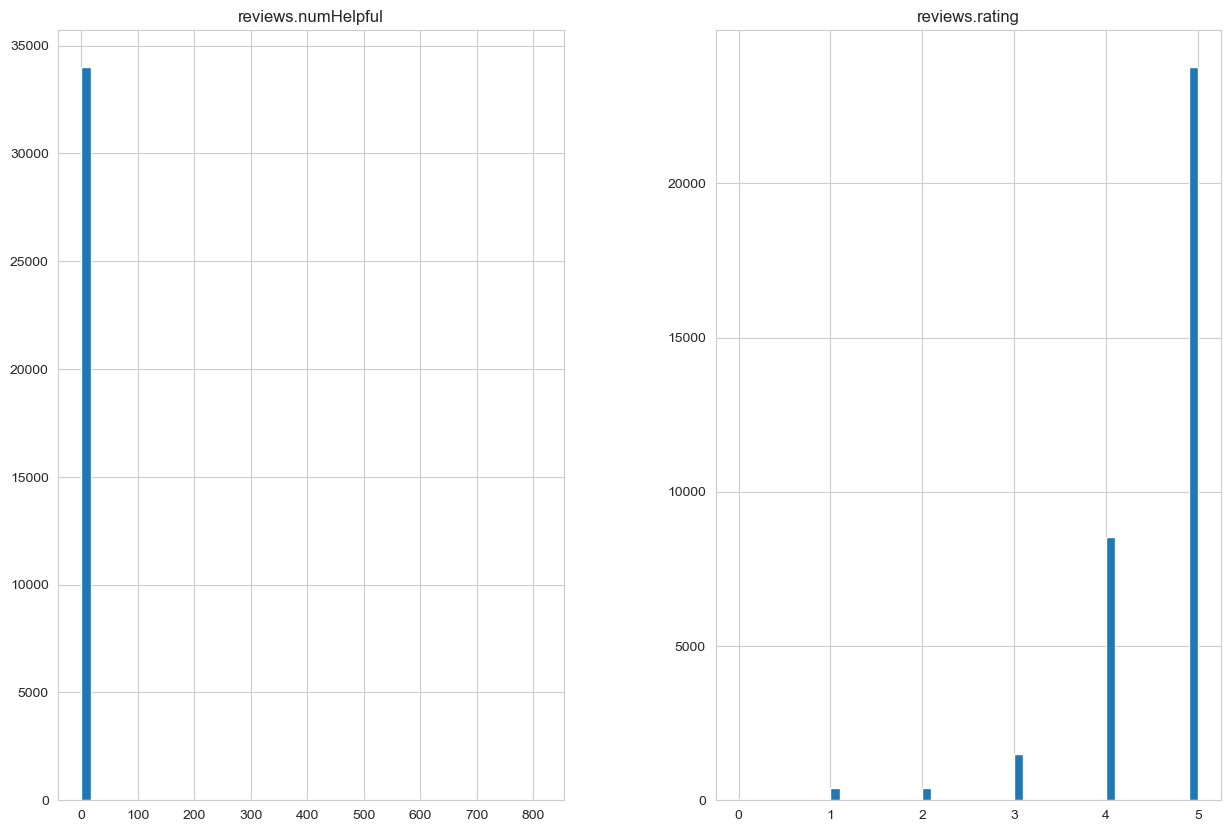

In [17]:
df.hist(bins=50, figsize=(15,10))
plt.show()

Text(0.5, 0, 'Rating count')

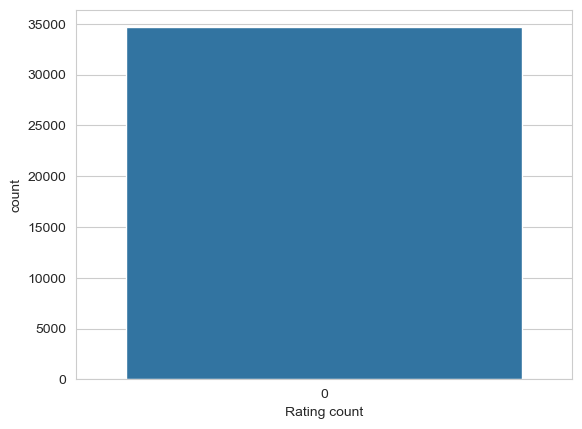

In [18]:
sns.countplot(df['reviews.rating'])
plt.xlabel('Rating count')

# Pre-processing Data

# using stop words

In [19]:
from nltk.corpus import stopwords
df['reviews.text']=df['reviews.text'].str.lower()

In [20]:
stopwords_list = stopwords.words('english')

In [21]:
from nltk.corpus import stopwords
", ".join(stopwords.words('english'))

"i, me, my, myself, we, our, ours, ourselves, you, you're, you've, you'll, you'd, your, yours, yourself, yourselves, he, him, his, himself, she, she's, her, hers, herself, it, it's, its, itself, they, them, their, theirs, themselves, what, which, who, whom, this, that, that'll, these, those, am, is, are, was, were, be, been, being, have, has, had, having, do, does, did, doing, a, an, the, and, but, if, or, because, as, until, while, of, at, by, for, with, about, against, between, into, through, during, before, after, above, below, to, from, up, down, in, out, on, off, over, under, again, further, then, once, here, there, when, where, why, how, all, any, both, each, few, more, most, other, some, such, no, nor, not, only, own, same, so, than, too, very, s, t, can, will, just, don, don't, should, should've, now, d, ll, m, o, re, ve, y, ain, aren, aren't, couldn, couldn't, didn, didn't, doesn, doesn't, hadn, hadn't, hasn, hasn't, haven, haven't, isn, isn't, ma, mightn, mightn't, mustn, mus

In [22]:
STOPWORDS = set(stopwords.words('english'))
def cleaning_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])
df['reviews.text'] = df['reviews.text'].apply(lambda x: " ".join([word for word in str(x).split() if word.lower() not in STOPWORDS]))
df['reviews.text'].head()

0    product far disappointed. children love use li...
1    great beginner experienced person. bought gift...
2    inexpensive tablet use learn on, step nabi. th...
3    i've fire hd 8 two weeks love it. tablet great...
4    bought grand daughter comes visit. set user, e...
Name: reviews.text, dtype: object

In [23]:
english_punctuations = string.punctuation
punctuations_list = english_punctuations
def cleaning_punctuations(text):
    translator = str.maketrans('', '', punctuations_list)
    return text.translate(translator)

In [24]:
df['reviews.text']= df['reviews.text'].apply(lambda x: cleaning_punctuations(x))
df['reviews.text'].tail()

34655    appreciably faster 18 higher amp charger used ...
34656    amazon include charger kindle fact theyre char...
34657    love kindle fire really disappointed kindle po...
34658    surprised find come type charging cords purcha...
34659    spite fact nothing good things say amazon anth...
Name: reviews.text, dtype: object

# Using Stemming

In [25]:

st = nltk.PorterStemmer()

def stemming_on_reviews_text(text):
    return [st.stem(word) for word in text]


df['reviews.text'] = df['reviews.text'].apply(lambda x: stemming_on_reviews_text(x))


In [26]:
df['reviews.text'].head()

0    [p, r, o, d, u, c, t,  , f, a, r,  , d, i, s, ...
1    [g, r, e, a, t,  , b, e, g, i, n, n, e, r,  , ...
2    [i, n, e, x, p, e, n, s, i, v, e,  , t, a, b, ...
3    [i, v, e,  , f, i, r, e,  , h, d,  , 8,  , t, ...
4    [b, o, u, g, h, t,  , g, r, a, n, d,  , d, a, ...
Name: reviews.text, dtype: object

# Using Lemmatization

In [27]:
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

# Download the 'wordnet' data
nltk.download('wordnet')

# Download 'punkt' for tokenization if not already done
nltk.download('punkt')

# Initialize the lemmatizer
lm = WordNetLemmatizer()

# Define the function to lemmatize text
def lemmatizer_on_reviews_text(text):
    # Tokenize the text into words
    words = word_tokenize(text)
    # Lemmatize each word
    return ' '.join([lm.lemmatize(word) for word in words])

# Apply the lemmatizer function to the 'reviews.text' column
df['reviews.text'] = df['reviews.text'].apply(lambda x: lemmatizer_on_reviews_text(x))


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


TypeError: expected string or bytes-like object, got 'list'

In [ ]:
df['reviews.text'].head()

In [ ]:
df

In [ ]:
x= df['reviews.text']
x.head()

In [ ]:
y= df['reviews.rating']
y.tail()

In [ ]:
X = df['reviews.text'].astype(str)

# splitting Data traning= 0.7, testing 0.3

In [ ]:
# spliting Data for Training and Testing in two parts  
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=21)

In [ ]:
y_train

# Uni-gram for results using models 

In [ ]:
#uni-gram
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(ngram_range=(1,1))

# Training data
X_train = vectorizer.fit_transform(X_train)

# Testing data
X_test = vectorizer.transform(X_test)

# Making prediction on the test set

In [ ]:
# uni-gram
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
print("Random Forest Result")
rfc = RandomForestClassifier(n_estimators=100, random_state=52)
pred = rfc.fit(X_train, y_train).predict(X_test)
print(accuracy_score(y_test,pred))

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,classification_report
dt = DecisionTreeClassifier(random_state=50)
print("Decision Tree Result")
DecisionTree=dt.fit(X_train, y_train).predict(X_test)
print(accuracy_score(y_test,DecisionTree))

from sklearn.svm import SVC
print("Support Vector Machine Result")
svm = SVC(kernel='linear', C=2.0, random_state=52)
svm.fit(X_train,y_train)
y_pred=svm.predict(X_test)
print(accuracy_score(y_test,y_pred))

from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
print("Logistic Regression Result")
logisticRegresion=lr.fit(X_train, y_train).predict(X_test)
print(accuracy_score(y_test,logisticRegresion))


# Compute Classification report

In [ ]:
#uni-gram
print("Random Forest")
print(classification_report(y_test,pred))

print("Decision Tree")
print(classification_report(y_test,DecisionTree))

print("Support Vector Machine")
print(classification_report(y_test,y_pred))

print("Logistic Regression")
print(classification_report(y_test,logisticRegresion))

In [ ]:
X = df['reviews.text'].astype(str)

In [ ]:
# spliting for Training-Testing 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=21)

# bi-gram for results using models 

In [ ]:
#bi-gram
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(ngram_range=(2,2))

# Training Data
X_train = vectorizer.fit_transform(X_train)

# Testing Data
X_test = vectorizer.transform(X_test)

# Making prediction on the test set

In [ ]:
# bi-gram
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
print("Random Forest Result")
rfc = RandomForestClassifier(n_estimators=100, random_state=52)
pred = rfc.fit(X_train, y_train).predict(X_test)
print(accuracy_score(y_test,pred))

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,classification_report
dt = DecisionTreeClassifier(random_state=50)
print("Decision Tree Result")
DecisionTree=dt.fit(X_train, y_train).predict(X_test)
print(accuracy_score(y_test,DecisionTree))

from sklearn.svm import SVC
print("Support Vector Machine Result")
svm = SVC(kernel='linear', C=2.0, random_state=52, gamma=0.001)
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
print(accuracy_score(y_test, y_pred))

from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
print("Logistic Regression Result")
logisticRegresion=lr.fit(X_train, y_train).predict(X_test)
print(accuracy_score(y_test,logisticRegresion))


# Compute Classification report

In [ ]:
#bi-gram
print("Random Forest")
print(classification_report(y_test,pred))

print("Decision Tree")
print(classification_report(y_test,DecisionTree))

print("Support Vector Machine")
print(classification_report(y_test,y_pred))

print("Logistic Regression")
print(classification_report(y_test,logisticRegresion))

In [ ]:
X = df['reviews.text'].astype(str)

In [ ]:
# spliting for Training-Testing 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=21)

# Tri-gram for results using models 

In [ ]:
#Tri-gram
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(ngram_range=(3,3))

# Training Data
X_train = vectorizer.fit_transform(X_train)

# Testing Data
X_test = vectorizer.transform(X_test)

# Making prediction on the test set

In [ ]:
# tri-gram
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
print("Random Forest Result")
rfc = RandomForestClassifier(n_estimators=100, random_state=52)
pred = rfc.fit(X_train, y_train).predict(X_test)
print(accuracy_score(y_test,pred))

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,classification_report
dt = DecisionTreeClassifier(random_state=50)
print("Decision Tree Result")
DecisionTree=dt.fit(X_train, y_train).predict(X_test)
print(accuracy_score(y_test,DecisionTree))

from sklearn.svm import SVC
print("Support Vector Machine Result")
svm = SVC(kernel='linear', C=2.0, random_state=52, gamma=0.001)
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
print(accuracy_score(y_test, y_pred))


from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
print("Logistic Regression Result")
logisticRegresion=lr.fit(X_train, y_train).predict(X_test)
print(accuracy_score(y_test,logisticRegresion))


# Compute Classification report

In [ ]:
#tri-gram
print("Random Forest")
print(classification_report(y_test,pred))

print("Decision Tree")
print(classification_report(y_test,DecisionTree))

print("Support Vector Machine")
print(classification_report(y_test,y_pred))

print("Logistic Regression")
print(classification_report(y_test,logisticRegresion))

In [ ]:
X = df['reviews.text'].astype(str)

In [ ]:
# spliting for Training-Testing 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=21)

# n-gram for results using models 

In [ ]:
#n-gram
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(ngram_range=(1,3))

# Training Data
X_train = vectorizer.fit_transform(X_train)

# Testing Data
X_test = vectorizer.transform(X_test)

# Making prediction on the test set

In [ ]:
# n-gram
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
print("Random Forest Result")
rfc = RandomForestClassifier(n_estimators=100, random_state=52)
pred = rfc.fit(X_train, y_train).predict(X_test)
print(accuracy_score(y_test,pred))

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,classification_report
dt = DecisionTreeClassifier(random_state=50)
print("Decision Tree Result")
DecisionTree=dt.fit(X_train, y_train).predict(X_test)
print(accuracy_score(y_test,DecisionTree))

from sklearn.svm import SVC
print("Support Vector Machine Result")
svm = SVC(kernel='linear', C=2.0, random_state=52)
svm.fit(X_train,y_train)
y_pred=svm.predict(X_test)
print(accuracy_score(y_test,y_pred))

from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
print("Logistic Regression Result")
logisticRegresion=lr.fit(X_train, y_train).predict(X_test)
print(accuracy_score(y_test,logisticRegresion))


# Compute Classification report

In [ ]:
#n-gram
print("Decision Tree")
print(classification_report(y_test,DecisionTree))

print("Random Forest")
print(classification_report(y_test,pred))

print("Logistic Regression")
print(classification_report(y_test,logisticRegresion))

print("Support Vector Machine")
print(classification_report(y_test,y_pred))

In [ ]:
# Assuming df is your cleaned DataFrame
df.to_csv('amazon_data.csv', index=False)